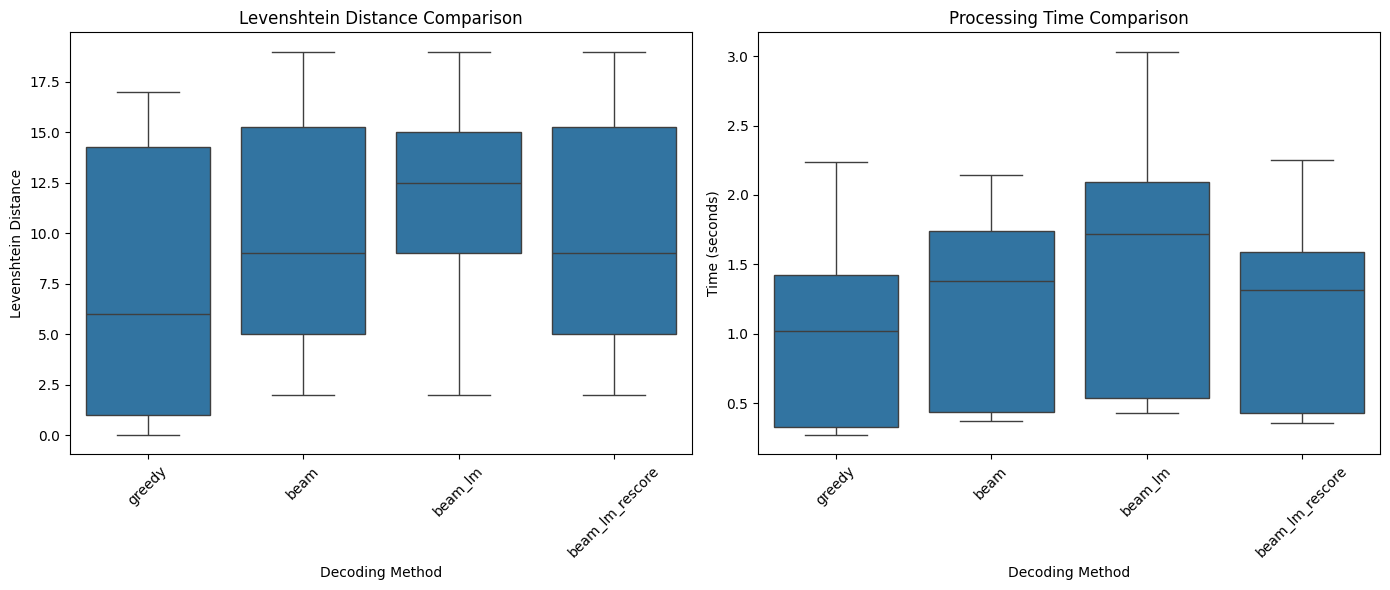


Levenshtein Distance Summary:
                 count   mean       std  min  25%   50%    75%   max
method                                                              
beam               8.0  10.00  6.094494  2.0  5.0   9.0  15.25  19.0
beam_lm            8.0  11.75  5.147815  2.0  9.0  12.5  15.00  19.0
beam_lm_rescore    8.0  10.00  6.094494  2.0  5.0   9.0  15.25  19.0
greedy             8.0   7.50  6.989788  0.0  1.0   6.0  14.25  17.0

Processing Time Summary:
                 count      mean       std       min       25%       50%  \
method                                                                     
beam               8.0  1.200201  0.713088  0.368374  0.438780  1.378327   
beam_lm            8.0  1.518765  0.951538  0.430268  0.535888  1.719837   
beam_lm_rescore    8.0  1.158493  0.709585  0.354116  0.425788  1.318107   
greedy             8.0  1.008566  0.698728  0.268622  0.328358  1.020837   

                      75%       max  
method                            

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('decoding_results.csv')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Levenshtein distance
sns.boxplot(x='method', y='lev_distance', data=df, 
            order=['greedy', 'beam', 'beam_lm', 'beam_lm_rescore'], ax=ax1)
ax1.set_title('Levenshtein Distance Comparison')
ax1.set_xlabel('Decoding Method')
ax1.set_ylabel('Levenshtein Distance')

# Boxplot for Time
sns.boxplot(x='method', y='time_sec', data=df, 
            order=['greedy', 'beam', 'beam_lm', 'beam_lm_rescore'], ax=ax2)
ax2.set_title('Processing Time Comparison')
ax2.set_xlabel('Decoding Method')
ax2.set_ylabel('Time (seconds)')

# Rotate x-axis labels if needed
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Add statistical summary
print("\nLevenshtein Distance Summary:")
print(df.groupby('method')['lev_distance'].describe())
print("\nProcessing Time Summary:")
print(df.groupby('method')['time_sec'].describe())

In [5]:
from wav2vec2decoder import Wav2Vec2Decoder, test

test_samples = [
    ("examples/sample1.wav", "IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL READY TO ACKNOWLEDGE MYSELF YOUR DEBTOR FOR AN ACT OF THE MOST NOBLE FORBEARANCE"),
    ("examples/sample2.wav", "AND IF ANY OF THE OTHER COPS HAD PRIVATE RACKETS OF THEIR OWN IZZY WAS UNDOUBTEDLY THE MAN TO FIND IT OUT AND USE THE INFORMATION WITH A BEAT SUCH AS THAT EVEN GOING HALVES AND WITH ALL THE GRAFT TO THE UPPER BRACKETS HE'D STILL BE ABLE TO MAKE HIS PILE IN A MATTER OF MONTHS"),
    ("examples/sample3.wav", "GUESS A MAN GETS USED TO ANYTHING HELL MAYBE I CAN HIRE SOME BUMS TO SIT AROUND AND WHOOP IT UP WHEN THE SHIPS COME IN AND BILL THIS AS A REAL OLD MARTIAN DEN OF SIN"),
    ("examples/sample4.wav", "IT WAS A TUNE THEY HAD ALL HEARD HUNDREDS OF TIMES SO THERE WAS NO DIFFICULTY IN TURNING OUT A PASSABLE IMITATION OF IT TO THE IMPROVISED STRAINS OF I DIDN'T WANT TO DO IT THE PRISONER STRODE FORTH TO FREEDOM"),
    ("examples/sample5.wav", "MARGUERITE TIRED OUT WITH THIS LONG CONFESSION THREW HERSELF BACK ON THE SOFA AND TO STIFLE A SLIGHT COUGH PUT UP HER HANDKERCHIEF TO HER LIPS AND FROM THAT TO HER EYES"),
    ("examples/sample6.wav", "AT THIS TIME ALL PARTICIPANTS ARE IN A LISTEN ONLY MODE"),
    ("examples/sample7.wav", "THE INCREASE WAS MAINLY ATTRIBUTABLE TO THE NET INCREASE IN THE AVERAGE SIZE OF OUR FLEETS"),
    ("examples/sample8.wav", "OPERATING SURPLUS IS A NON CAP FINANCIAL MEASURE WHICH IS DEFINED AS FULLY IN OUR PRESS RELEASE"),
]


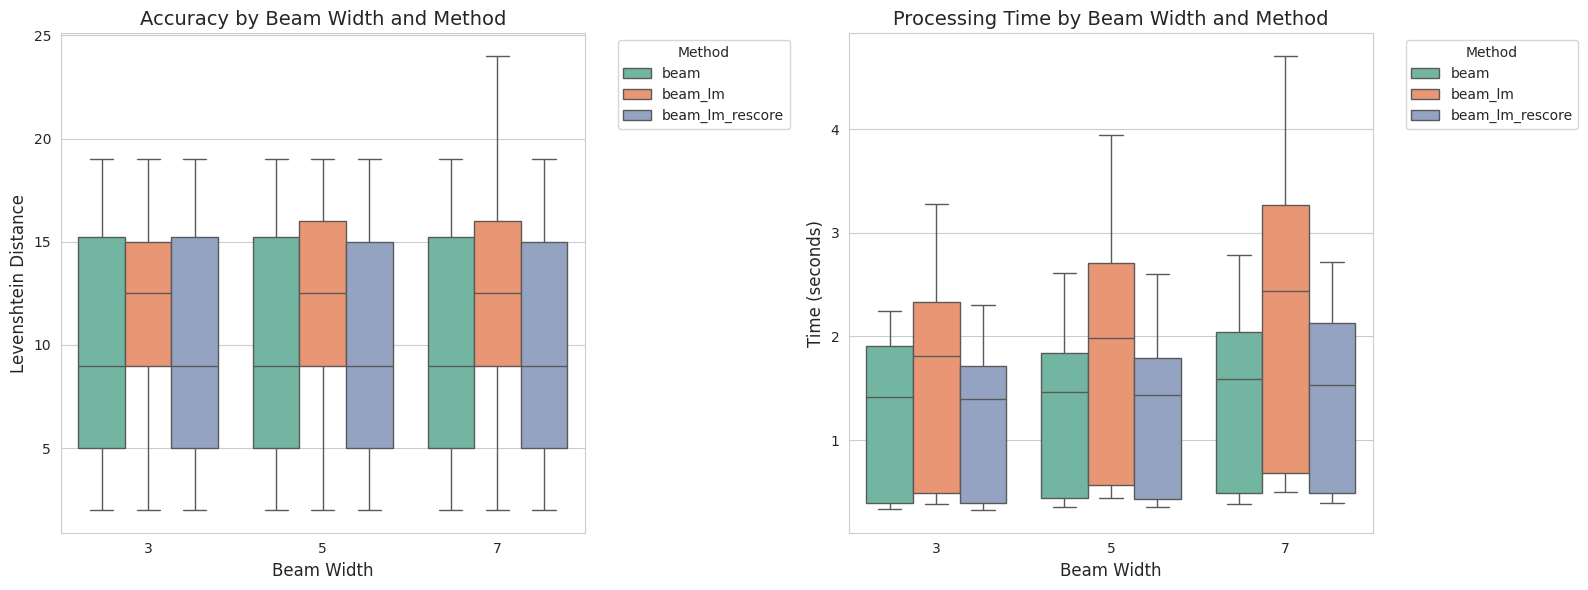



Best Configurations:
Best Accuracy: Beam 17    3
17    5
17    7
Name: beam_width, dtype: int64 with 17    beam
17    beam
17    beam
Name: method, dtype: object 
(Distance: 17    2
17    2
17    2
Name: lev_distance, dtype: int64, Time: 17    1.488210
17    1.563367
17    1.741349
Name: time_sec, dtype: float64s)
Fastest Method: Beam 27    3
27    5
27    7
Name: beam_width, dtype: int64 with 27    beam_lm_rescore
27    beam_lm_rescore
27    beam_lm_rescore
Name: method, dtype: object 
(Distance: 27    19
27    19
27    19
Name: lev_distance, dtype: int64, Time: 27    0.324877
27    0.356200
27    0.418318
Name: time_sec, dtype: float64s)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and combine all beam width results
beam_dfs = []
for width in [3, 5, 7]:
    df = pd.read_csv(f'beam_widths_{width}.csv')
    df['beam_width'] = width
    beam_dfs.append(df)
    
combined_df = pd.concat(beam_dfs)

# Filter out greedy method and keep only beam variants
beam_methods = ['beam', 'beam_lm', 'beam_lm_rescore']
combined_df = combined_df[combined_df['method'].isin(beam_methods)]

# Set up visualization
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")  # Using seaborn's built-in style instead

# 1. Levenshtein Distance Analysis
plt.subplot(1, 2, 1)
sns.boxplot(x='beam_width', y='lev_distance', hue='method', 
            data=combined_df, palette='Set2')
plt.title('Accuracy by Beam Width and Method', fontsize=14)
plt.xlabel('Beam Width', fontsize=12)
plt.ylabel('Levenshtein Distance', fontsize=12)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Processing Time Analysis
plt.subplot(1, 2, 2)
sns.boxplot(x='beam_width', y='time_sec', hue='method', 
            data=combined_df, palette='Set2')
plt.title('Processing Time by Beam Width and Method', fontsize=14)
plt.xlabel('Beam Width', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# # Statistical Analysis
# print("="*60)
# print("Performance Analysis by Beam Width and Method".center(60))
# print("="*60)

# # Accuracy stats
# print("\nLevenshtein Distance (Lower Better):")
# dist_stats = combined_df.groupby(['beam_width', 'method'])['lev_distance'].agg(
#     ['mean', 'median', 'std', 'min', 'max'])
# print(dist_stats)

# # Time stats
# print("\n\nProcessing Time in Seconds:")
# time_stats = combined_df.groupby(['beam_width', 'method'])['time_sec'].agg(
#     ['mean', 'median', 'std', 'min', 'max'])
# print(time_stats)

# Find optimal configurations
best_accuracy = combined_df.loc[combined_df['lev_distance'].idxmin()]
best_speed = combined_df.loc[combined_df['time_sec'].idxmin()]

print("\n\nBest Configurations:")
print(f"Best Accuracy: Beam {best_accuracy['beam_width']} with {best_accuracy['method']} ")
print(f"(Distance: {best_accuracy['lev_distance']}, Time: {best_accuracy['time_sec']}s)")
print(f"Fastest Method: Beam {best_speed['beam_width']} with {best_speed['method']} ")
print(f"(Distance: {best_speed['lev_distance']}, Time: {best_speed['time_sec']}s)")

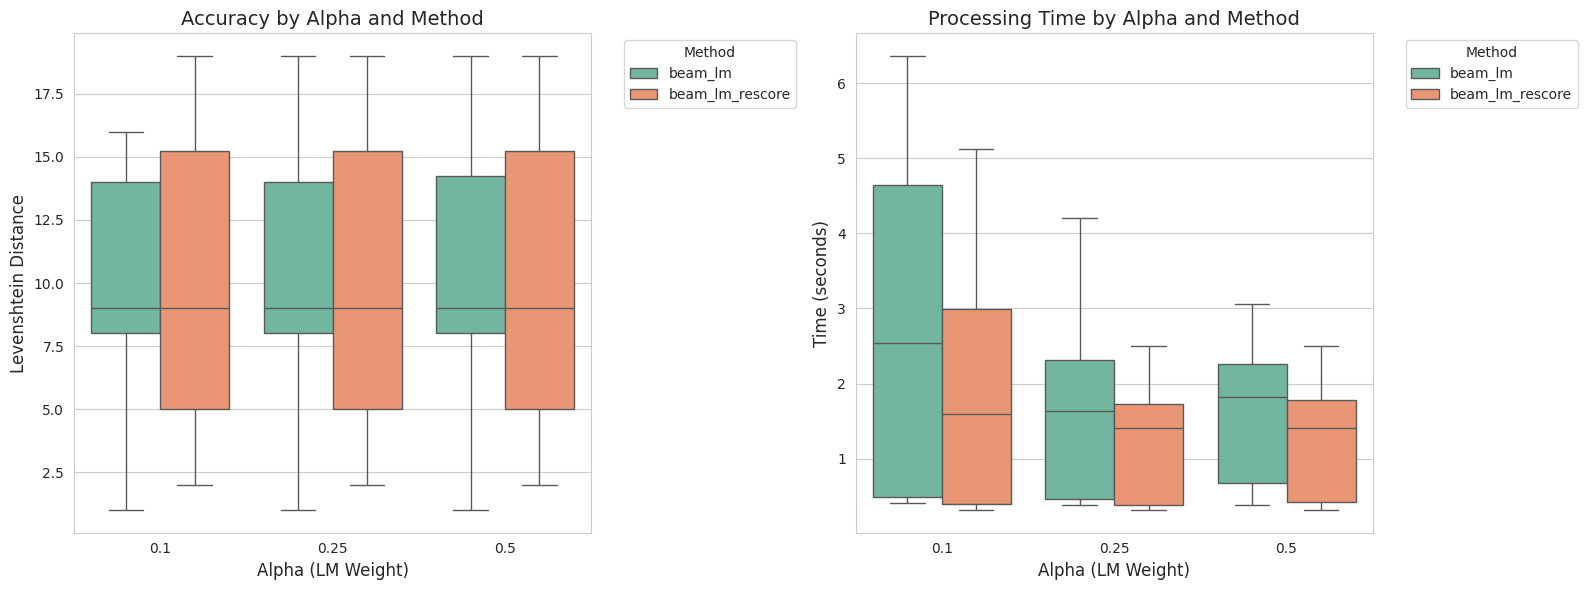

          Performance Analysis by Alpha and Method          

Levenshtein Distance (Lower Better):
                         mean  median       std  min  max
alpha method                                             
0.10  beam_lm           9.875     9.0  4.764077    1   16
      beam_lm_rescore  10.000     9.0  6.094494    2   19
0.25  beam_lm          10.250     9.0  5.391793    1   19
      beam_lm_rescore  10.000     9.0  6.094494    2   19
0.50  beam_lm          10.375     9.0  5.501623    1   19
      beam_lm_rescore  10.000     9.0  6.094494    2   19


Processing Time in Seconds:
                           mean    median       std       min       max
alpha method                                                           
0.10  beam_lm          2.761443  2.536158  2.311070  0.413239  6.359577
      beam_lm_rescore  1.998884  1.599920  1.783710  0.321621  5.116713
0.25  beam_lm          1.686691  1.634792  1.314829  0.382150  4.200753
      beam_lm_rescore  1.226572  1.410892  0.80

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and combine all alpha results
alpha_dfs = []
for alpha in [0.1, 0.25, 0.5]:
    df = pd.read_csv(f'alphas_{alpha}.csv')
    df['alpha'] = alpha  # Add alpha column
    alpha_dfs.append(df)
    
combined_df = pd.concat(alpha_dfs)

# Filter out greedy method and keep only relevant methods
beam_methods = ['beam', 'beam_lm', 'beam_lm_rescore']
combined_df = combined_df[combined_df['method'].isin(beam_methods)]

# Set up visualization
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# 1. Levenshtein Distance Analysis
plt.subplot(1, 2, 1)
sns.boxplot(x='alpha', y='lev_distance', hue='method',
            data=combined_df, palette='Set2')
plt.title('Accuracy by Alpha and Method', fontsize=14)
plt.xlabel('Alpha (LM Weight)', fontsize=12)
plt.ylabel('Levenshtein Distance', fontsize=12)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Processing Time Analysis
plt.subplot(1, 2, 2)
sns.boxplot(x='alpha', y='time_sec', hue='method',
            data=combined_df, palette='Set2')
plt.title('Processing Time by Alpha and Method', fontsize=14)
plt.xlabel('Alpha (LM Weight)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("="*60)
print("Performance Analysis by Alpha and Method".center(60))
print("="*60)

# Accuracy stats
print("\nLevenshtein Distance (Lower Better):")
dist_stats = combined_df.groupby(['alpha', 'method'])['lev_distance'].agg(
    ['mean', 'median', 'std', 'min', 'max'])
print(dist_stats)

# Time stats
print("\n\nProcessing Time in Seconds:")
time_stats = combined_df.groupby(['alpha', 'method'])['time_sec'].agg(
    ['mean', 'median', 'std', 'min', 'max'])
print(time_stats)

# Find optimal alpha configurations
best_accuracy = combined_df.loc[combined_df['lev_distance'].idxmin()]
best_speed = combined_df.loc[combined_df['time_sec'].idxmin()]


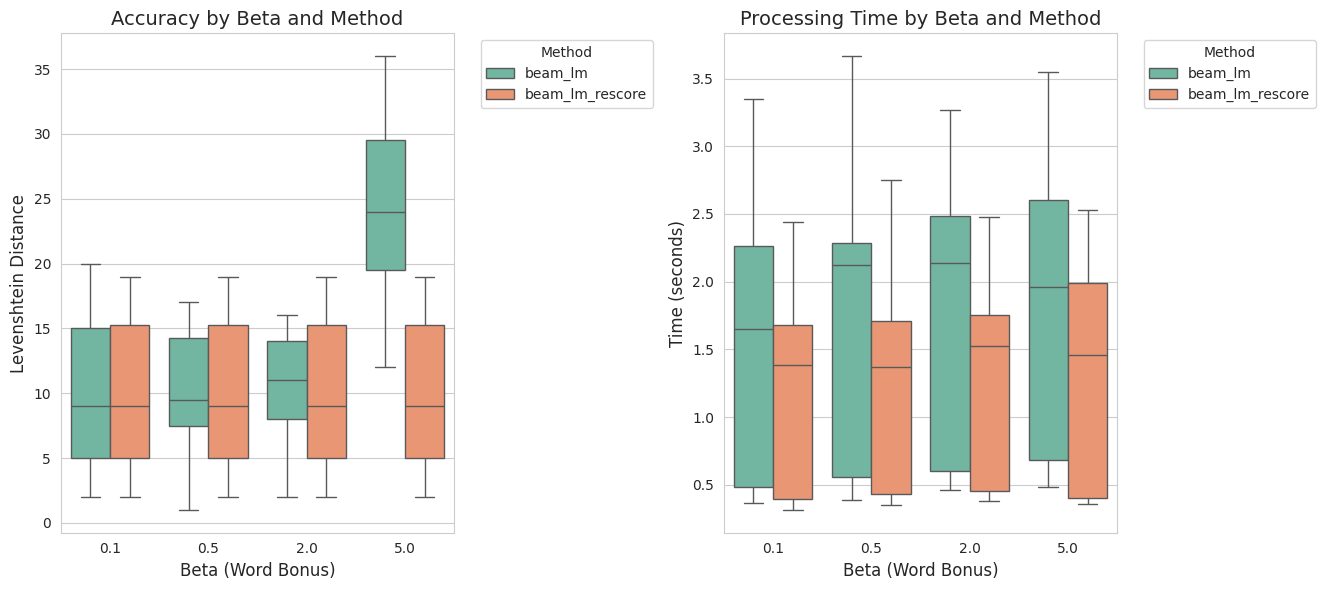

               Performance Analysis by Beta and Method                

Levenshtein Distance (Lower Better):
                      mean  median       std  min  max
beta method                                           
0.1  beam_lm          10.0     9.0  6.187545    2   20
     beam_lm_rescore  10.0     9.0  6.094494    2   19
0.5  beam_lm          10.0     9.5  5.291503    1   17
     beam_lm_rescore  10.0     9.0  6.094494    2   19
2.0  beam_lm          10.5    11.0  4.598136    2   16
     beam_lm_rescore  10.0     9.0  6.094494    2   19
5.0  beam_lm          24.5    24.0  8.071113   12   36
     beam_lm_rescore  10.0     9.0  6.094494    2   19


Processing Time in Seconds:
                          mean    median       std       min       max
beta method                                                           
0.1  beam_lm          1.592903  1.649976  1.120446  0.367301  3.350947
     beam_lm_rescore  1.224735  1.385109  0.807345  0.314086  2.440445
0.5  beam_lm          1.766

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and combine all beta results
beta_dfs = []
for beta in [0.1, 0.5, 2.0, 5.0]:
    df = pd.read_csv(f'betas_{beta}.csv')
    df['beta'] = beta  # Add beta column
    beta_dfs.append(df)
    
combined_df = pd.concat(beta_dfs)

# Filter out greedy method and keep only relevant methods
beam_methods = ['beam', 'beam_lm', 'beam_lm_rescore']
combined_df = combined_df[combined_df['method'].isin(beam_methods)]

# Set up visualization
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")

# 1. Levenshtein Distance Analysis
plt.subplot(1, 3, 1)
sns.boxplot(x='beta', y='lev_distance', hue='method',
            data=combined_df, palette='Set2')
plt.title('Accuracy by Beta and Method', fontsize=14)
plt.xlabel('Beta (Word Bonus)', fontsize=12)
plt.ylabel('Levenshtein Distance', fontsize=12)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Processing Time Analysis
plt.subplot(1, 3, 2)
sns.boxplot(x='beta', y='time_sec', hue='method',
            data=combined_df, palette='Set2')
plt.title('Processing Time by Beta and Method', fontsize=14)
plt.xlabel('Beta (Word Bonus)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Word Count Analysis (if available in data)
if 'word_count' in combined_df.columns:
    plt.subplot(1, 3, 3)
    sns.boxplot(x='beta', y='word_count', hue='method',
                data=combined_df, palette='Set2')
    plt.title('Word Count by Beta and Method', fontsize=14)
    plt.xlabel('Beta (Word Bonus)', fontsize=12)
    plt.ylabel('Word Count', fontsize=12)
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("="*70)
print("Performance Analysis by Beta and Method".center(70))
print("="*70)

# Accuracy stats
print("\nLevenshtein Distance (Lower Better):")
dist_stats = combined_df.groupby(['beta', 'method'])['lev_distance'].agg(
    ['mean', 'median', 'std', 'min', 'max'])
print(dist_stats)

# Time stats
print("\n\nProcessing Time in Seconds:")
time_stats = combined_df.groupby(['beta', 'method'])['time_sec'].agg(
    ['mean', 'median', 'std', 'min', 'max'])
print(time_stats)

